# FEM Notebook 1: Mathematical Review

## Introduction

Welcome to the first notebook in my series "Understanding and Using the Finite Element Method". This is an introductory notebook, intended to help familiarise you with some mathematical concepts we will need to understand the theory of the Finite Element Analysis. Most of this information should not be new to you, but a reminder will serve to be useful. I will provide additional reading sources for each topic.

### Learning Objectives

The learning objectives for this notebook are as follows,

- To recall the definitions vector spaces, linear independence, basis, and to be able to provide examples of these.
- To recall some definitions in vector calculus, including scalar vs vector fields, gradient, divergence, curl and flux.
- To be able to perform simple multi-dimensional integrals on different domains.
- To recall and derive some vector calculus theorems, such as the Divergence theorem and Green's identities.

## 1. Vector Spaces

### 1.1 Fields and Vectors

We will need to introduce a few definitions here. Firstly, recall that a **Field** $F$ is a set, equipped with two binary operations $+$ and $\times$ such that ($F$, +) and ($F$, $\times$) are both groups. The full list of axioms for groups is not that important right now, but for reference they are closure, associativity, exisitence of an identity element and existence of an inverse element.

For our purposes, we will be exclusively interested in vectors over the fields $\mathbb{R}$ (the real numbers) and $\mathbb{C}$ (the complex numbers), where $\times$ and $+$ are defined as regular multiplication and addition. Feel free to convince yourselves that these are both fields from your own understanding of multiplication and addition.

Then a **Vector Space** over a field $F$ is a group ($V$, $+$), satisfying all group axioms, together with a multiplication operation $\times$, defined between vectors and elements of $F$. A vector space must satisfy the following axioms for all $1,a,b \in F$ and $\underline{u},\underline{v} \in V$,

$$1 \times \boldsymbol{\underline{v}} = \boldsymbol{\underline{v}} \tag{Identity}$$
$$a \times (\boldsymbol{\underline{u}} + \boldsymbol{\underline{v}}) = a \times \boldsymbol{\underline{u}} + a \times \boldsymbol{\underline{v}} \tag{Distributing a scalar over vectors}$$
$$(a+b) \times \boldsymbol{\underline{v}} = a\times \boldsymbol{\underline{v}} + b\times \boldsymbol{\underline{v}} \tag{Distributing a vector over scalars}$$
$$a\times (b \times \boldsymbol{\underline{v}}) = (a \times b) \times \boldsymbol{\underline{v}} \tag{Associativity of multiplication}$$

Notice that commutativity is not necessary.

One example of a vector space is the space $F^n$, whose vectors are just ordered $n$-tuples of elements of $F$. Vectors from this space are often notated stacked in columns and are simply called *vectors* by most. Another example would be the set $M_{m,n}(F)$, which is the set of $m \times n$ matrices whose entries are from $F$. This space is not commutative, since matrix multiplication depends on the order of operations.

What we will be focusing on most is the idea of a **function space**. This is a vector space's constituent elements are functions. For instance, consider the space of polynomials of at most degree $n$, denoted $P_n$. This is a space comprised of polynomial functions of the form $f:\mathbb{R}\rightarrow\mathbb{R}$, with $f(x)=c_0 + c_1x + c_2x^2 \cdots c_nx^n$ and $c_i \in \mathbb{R}$. We can treat the coefficients similarly to the entries in a regular vector. To further understand this vector space and others more, we will have to introduce some definitions.

### 1.2 Linear Independence

We must first revisit the idea of a **linear combination** of vectors. Consider a vector space $V$ over some field $F$. Let $c_i \in F$ and $\boldsymbol{\underline{v_i}} \in V$ for $i=0,1,\dots,n$. The sum $c_0\boldsymbol{\underline{v_0}} + c_1\boldsymbol{\underline{v_1}} + \dots + c_n\boldsymbol{\underline{v_n}}$ is defined as a linear combination of the vectors $v_i$. This sum evaluates to another vector. Then the **span** of some set of vectors is the set of all possible vectors that can be made by varying the coefficients $c_i$ to make different linear combinations of the given vectors.

For example, consider the vectors $(0,1),(2,3) \in \mathbb{R}^2$. We have that $2\times(0,1) + (2,3) = (2,5)$. So we can say,

* $(2,5)$ can be written as a linear combination of $(0,1)$ and $(2,3)$.
* $(2,5)$ is in the span of $(0,1)$ and $(2,3)$.

If the span of a set of vectors is equal to some set, we can say that those vectors span that set. For instance, we will prove later that the set $\{ (0,1), (2,3) \}$ spans $\mathbb{R}^2$.

Another important concept is **linear dependence**. A set of vectors is linearly dependent if the following equation for some fixed set of vectors $\{\boldsymbol{\underline{v_0}} \cdots \boldsymbol{\underline{v_n}}\}$ has a non-trivial solution. If the equation does not have a non-trivial solution, the vectors are **linearly independent**.

$$ c_0\boldsymbol{\underline{v_0}} + c_1\boldsymbol{\underline{v_1}} + \cdots + c_n\boldsymbol{\underline{v_n}} = \boldsymbol{\underline{0}} \tag*{[1]}$$

As you can hopefully see, the trivial solution is $c_0=c_1=\cdots=c_n=0$. This is excluded for two reasons. Firstly, this would make for an unhelpful definition since all vectors would be linearly dependent. Secondly, if we exclude this solution, we can rewrite [1] as,

$$c_0\boldsymbol{\underline{v_0}} + c_1\boldsymbol{\underline{v_1}} + \cdots + c_{n-1}\boldsymbol{\underline{v_{n-1}}} = -c_n\boldsymbol{\underline{v_n}}$$
$$-\frac{c_0}{c_n}\boldsymbol{\underline{v_0}} - \frac{c_1}{c_n}\boldsymbol{\underline{v_1}} - \cdots - \frac{c_{n-1}}{c_n}\boldsymbol{\underline{v_{n-1}}} = \boldsymbol{\underline{v_n}}$$
$$x_0\boldsymbol{\underline{v_0}} + x_1\boldsymbol{\underline{v_1}} + \cdots + x_n\boldsymbol{\underline{v_{n-1}}} = \boldsymbol{\underline{v_n}} \tag*{[2]}$$

We have defined $x_i = -\frac{c_i}{c_n}$ in the final line. Notice that since we are diving by $c_n$, it must be non-zero and, in fact, the vectors could be defined in any order, so we must have at least one $c_i\neq0$. This motivates our informal definition of linear dependence: A set of vectors is linearly dependent if any vector in that set can be written as a linear combination of the other vectors; which is what we have in the final line.

Proving linear dependence for a set of vectors is as simple as finding a linear combination of those vectors that creates one of the vectors in the set. Equivalently, we can find a non-trivial solution to [1]. Therefore, to prove linear independence we must prove that the only solution to [1] is the trivial solution $c_i=0$ for all $i = 0, \cdots, n$. To determine if [1] has another solution, we rewrite it as a system of linear equations by defining $\boldsymbol{\underline{x}}=(x_1, x_2, \cdots, x_n)$ and a matrix $M$, whose $i$-th column is $v_i$. We can then write,

$$M\boldsymbol{\underline{x}} = \boldsymbol{\underline{0}}$$
$$\boldsymbol{\underline{x}} = M^{-1}\boldsymbol{\underline{0}}$$
$$\boldsymbol{\underline{x}} = \boldsymbol{\underline{0}}$$

So, if $M^{-1}$ exists, the only solution is a trivial solution. Otherwise, another solution must exist which could be found by Gaussian elimination or some other linear equation solving method. $M^{-1}$ exists if and only if $det(M)\neq 0$. Hence $det(M)\neq 0 \iff \{\boldsymbol{\underline{v_0}},\cdots, \boldsymbol{\underline{v_n}}\}$ is linearly independent.

##### Check Exercises 1

- Prove the set $U_1 = \{ (2, 0, 1), (1, 1, 0), (0, 4, 0) \}$ is linearly independent.

- Prove the set $U_2 = \{ (1, -4, 0), (-2, 0, 8), (\frac{73}{20}, -\frac{28}{5}, -9) \}$ is linearly dependent. Find some linear combination of vectors in $U_2$ that is equal to another element of $U_2$.

### 1.3 Basis

Our final defintion for the chapter will be a **basis**. A basis $U$, with respect to some vector space $V$, is a set of vectors from $V$ that spans $V$ and is linearly independent. For example:

- In $\mathbb{R}^2$ it should be clear that $U_1=\{ (1, 0), (0, 1) \}$ is a spanning set. We can write a generic vector $\boldsymbol{\underline{v}} \in \mathbb{R}^2$ as $\boldsymbol{\underline{v}} = (c_0, c_1)$ for some $c_0,c_1 \in \mathbb{R}$. Then the linear combination  $c_0(1,0) + c_1(0,1) = (c_0, c_1)$ describes such a vector. Proving linear independence is also trivial since in our linear equation, $M$ will be the identity matrix, which is it's own inverse and therefore, the only solution is $c_0=c_1=0$. Hence $U$ is a basis of $\mathbb{R}^2$. This set is called the *standard basis* for $\mathbb{R}^2$ and can expand to $n$ dimensions in a similar way.

- We can also find a basis for $P_n$. This will be the set $U_2 = \{ 1, x, x^2, \cdots, x^n \}$. Spanning is proven similarly to the previous example and linear independence follows like so. We consider the equation [1] $c_0 + c_1x + c_2x^2 \cdots c_nx^n = 0$. One approach to solving this kind of equation would be equating coefficients of powers of $x$. Doing so leads us to the only solution, which is the trivial one. This may be harder to see than the previous example, but recall we are solving only for $c_i$ and not $x$. As such the equation must remain true for all $x\in\mathbb{R}$ (the functions' domain). This is also the standard basis for $P_n$.

- Other bases exist than the standard basis, for instance $U_3=\{ 17, 2-x, x+\frac{x^2}{4} \}$. This is a basis of $P_2$ and can be proved by linearly transforming each element of $U_3$ into an element of the standard basis. This just means constructing a linear combination for each element.

    - $17$ can be transformed into $1$ by $\frac{1}{17}(\color{red}{17})$.
    - $2-x$ can be transformed into $x$ by $-1(\color{red}{2-x}) - \frac{2}{17}(\color{red}{17})$.
    - $x + \frac{x^2}{4}$ can be transformed into $x^2$ by $-4\left((\color{red}{2-x}) + \frac{2}{17}(\color{red}{17} ) \right) + 4\left(\color{red}{x+\frac{x^2}{4}}\right)$
    
    The individual vectors from $U_3$ have been written in red to help highlight the fact these are in fact linear combinations. So we can convert any of our vectors from $U_3$ into vectors in the standard basis. We already know we can obtain any element in $P_2$ through a linear combination of vectors from the standard basis. Therefore, it must be the case that there is a linear combination of vectors in $U_3$ that can produce produce any vector in $P_2$, since we only have to compose these linear combinations. Hence, $U_3$ spans $P_2$. Proving linear independence is also straightforward, we only have to equate coefficients of [1] again.
    
    $$c_0(17) + c_1(2-x) + c_2\left(x + \frac{x^2}{4}\right) = 0 \\
    17c_0 + 2c_1 + x(-c_1 + c_2) + x^2\left(\frac{c_2}{4}\right) = 0$$
    
    We immediately see that $c_2 = 0$ and then by back-substitution we can find that $c_1=c_0=0$ as well. Hence, the set is linearly independent and as such, forms a basis for $P_2$. 
    
One final definition is that of a vector space's **dimension**. It simply describes the number of elements in a basis of that space. It should be said that all bases have the same size.

##### Check Exercises 2

- Prove that $\{ (2,0,5), (1,-1,1), (-3,0,0) \}$ forms a basis over $\mathbb{R}^3$.

- Prove that all bases of a vector space have the same size.

- Explain why a set of vectors of size $n+1$ from a vector space of dimension $n$ cannot be linearly independent.

- Provide a basis for the vector space of *all* real-valued polynomials $P(\mathbb{R})$ and state it's dimension.

## 2. Vector Calculus

### 2.1 Vector/Scalar Fields and Partial Derivatives

Now we have reviewed our understanding of vector spaces, we should now review the language of PDEs; vector calculus. I am going to assume a baseline knowledge here, most of this should be a refresher, so I won't be going over the definitions of regular derivatives or integrals. We should first review the idea of scalar vs vector fields. This is very different from the fields spoken about in section 1.1. Here field is essentially another word for a function, the distinction being that a field typically acts on space, whereas a function could be acting on anything. A **scalar field** is a field that maps each point in space to a single value, a scalar. A **vector field** is a field that maps each point to multiple values, a vector.

For instance, consider the function $t:\mathbb{R}^3\rightarrow\mathbb{R}$ could denote the temperature at each point in three-dimensional space. This would be a scalar field, because temperature is a scalar value. An example of a vector field might be $\boldsymbol{\underline{V}}:\mathbb{R}^3\rightarrow\mathbb{R}^3$, denoting the velocity of a fluid in three-dimensional space. Each point in space is mapped to 3 values, an $x$-component, a $y$-component and a $z$-component of the point's velocity. These components form a vector and hence $v$ is a vector field.

Now we can talk about partial derivatives. Consider the scalar field $f:\mathbb{R}^3 \rightarrow \mathbb{R}$. We can take the derivative of $f$ with respect to any of the variables in $\mathbb{R}^3$, while keeping the others constant. This is called a **partial derivative** and is useful for examining the rate of change of a function when only one of the variables changes. So if we have $f(x,y,z)$, we can define the first partial derivative of $f$ to be $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$ or $\frac{\partial f}{\partial z}$. It is calculated by taking a regular derivative and treating the other variables as constants.

For instance, if $f(x,y,z)= x^2(\log(x) + \sin(y)\cos(z))$, the three first partial derivatives of $f$ are,

$$\frac{\partial f}{\partial z} = x^2\sin(y)\frac{\mathrm{d}}{\mathrm{d}z} \Big[cos(z)\Big] = -x^2\sin(y)\sin(z) \\
\frac{\partial f}{\partial y} = x^2\cos(z)\frac{\mathrm{d}}{\mathrm{d}y} \Big[\sin(y)\Big] = x^2\cos(z)\cos(y) \\
\frac{\partial f}{\partial x} = \frac{\mathrm{d}}{\mathrm{d}x}\Big[x^2\log(x)\Big] + \frac{\mathrm{d}}{\mathrm{d}x}\Big[x^2\Big]sin(y)cos(z)= x+2x\log(x) + 2x\sin(y)\cos(z)$$

Second, third and higher partial derivatives are calculated similarly, we simply perform the differentiation twice to calculate. We can also have **mixed partial derivaties**, where we first differentiate with respect to one variable and then another, e.g. $\frac{\partial^2 f}{\partial x \partial y}$. One can also take the partial derivative of a vector field. This means we just perform the differentiation to each component.

##### Check Exercises 3

- For the following examples state whether they are a scalar or vector field.
    - A function measuring pressure over a 2-dimensional map.
    - A function measuring the gravitational force around some 3-dimensional body. 
    - A function measuring wind speed around a 3-dimensional model of an aeroplane.
    - The function shown in the following graph:
    
    ![Field](Field.png)
    
- Find $\frac{\partial f}{\partial x}$ where $f(x,y) = e^{y^2x^2}$. Then find $\frac{\partial^2 f}{\partial x \partial y}$.

### 2.2 Differential Operators

So we have recalled the definitions of scalar and vector fields, and how to take a partial derivative of a scalar field. But there are other things we can do with partial derivatives, and there are ways to apply them to vector fields as well to learn things about them. A differential operator is a just like a regular operator such as $\times$ or $+$, but is typically a *unary* operator, so only has one input.

The first operator we should introduce the differential operator $\nabla$, called 'del'. It applies to scalar fields and is used to essentially create a vector of first partial derivatives. We define it as, $\nabla = (\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z})$ so for some $f:\mathbb{R}^3\rightarrow\mathbb{R}$ we can define $\nabla f = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z})$, which is called the **gradient of $f$**, often shortened to grad. The geometric interpretation of $\nabla f$, is that it is a vector that points in the direction of greatest increase of $f$ and it's magnitude is equal to that rate of change.

The next  operator is called **divergence**. It acts on a vector field, so consider some vector field $\underline{F}:\mathbb{R}^3\rightarrow\mathbb{R^3}$, with $\underline{F}(x,y,z) = (F_x(x,y,z), F_y(x,y,z), F_z(x,y,z))$, where $F_x,F_y,F_z$ are scalar fields. Then we have $\mathrm{div}\left(\boldsymbol{\underline{F}}\right) = \nabla \cdot \boldsymbol{\underline{F}}$. More precisely,

$$
\begin{align*}
\mathrm{div}(\boldsymbol{\underline{F}}) &= \nabla \cdot \boldsymbol{\underline{F}} \\
&= (\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z}) \cdot \boldsymbol{\underline{F}} \\ 
&= (\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z}) \cdot (F_x, F_y, F_z) \\ 
&= \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}
\end{align*}
$$

$\mathrm{div}(\boldsymbol{\underline{F}})$ is a scalar field, mapping each point to a scalar value. It describes the net flow of $\boldsymbol{\underline{F}}$ out of a given point. So if $\mathrm{div}(\boldsymbol{\underline{F}})|_{(0,0,0)} = 1$, there is a unit quantity of $\boldsymbol{\underline{F}}$ coming *out of* the origin, and conversely, if $\mathrm{div}(\boldsymbol{\underline{F}})|_{(0,0,0)} = -1$, the quantity is going *into* the origin. If a field has gradient $0$ everywhere, then it is called **incompressible**. Water is an incompressible fluid under normal conditions, it cannot be made any denser or thinner. Therefore, when attempting to model the fluid, it's velocity field $\boldsymbol{\underline{u}}$ must meet the requirement $\nabla \cdot \boldsymbol{\underline{u}} = 0$. Air is not an incompressible fluid however, since it has space to contract and expand, so this requirement is not necessary. We will come back to the compressiblility of fluids later, when we solve the Navier-Stokes Equations.

Another important differential operator is **curl**. It is also defined on vector fields, this time as $\mathrm{curl}\left(\boldsymbol{\underline{F}}\right) = \nabla \times \boldsymbol{\underline{F}}$, where $\times$ is the vector cross-product. Recall the cross product can calculated by finding the determinant of the following $3\times3$ matrix.

$$
\begin{align*}
\nabla \times \boldsymbol{\underline{F}} &= \begin{vmatrix}
\underline{i} & \underline{j} & \underline{k}\\
\frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z} \\
F_1 & F_2 & F_3
\end{vmatrix} \\
&=\left(\left(\frac{\partial F_3}{\partial y} - \frac{\partial F_2}{\partial z})\right), \left(\frac{\partial F_1}{\partial z} - \frac{\partial F_3}{\partial x})\right), \left(\frac{\partial F_2}{\partial x} - \frac{\partial F_1}{\partial y}\right) \right)
\end{align*}
$$

Here, $\underline{i}, \underline{j}$ and $\underline{k}$ are the elements of the standard basis of $\mathbb{R}^3$ (*see section 1.3*). A geometric interpretation of curl is that it is a vector the describes how much the field $\boldsymbol{\underline{F}}$ tends to rotate at that point. The direction of $\nabla \times \boldsymbol{\underline{F}}$ is the axis of rotation, and the magnitude is proportional to the 'speed' of rotation at that point. To understand curl we should consider the following examples,

| ![Uniform Curl Vector Field](uniform_curl.png)| ![Irrotational Vector Field](Irrotational_vector_field.png)|
|:---:|:---:|
|Fig 1: Vector field 1 |Fig 2: Vector field 2 |

We want to intuitively determine the curl of these fields, or if they have curl any at all. To do this, imagine the vectors represent fluid velocity. Then imagine dropping a beach ball in the fluid. This is a special beach ball in that it can only rotate at it's fixed position and cannot move. For each of the fields above, try to imagine if it will spin, and if so, which way.

The image on the left has curl. The outside vectors are much stronger than the inside ones, creating a spinning effect. The beach ball will be spinning counter clockwise.
The field on the right appears as though it would have curl, but it actually does not. Try to imagine the ball again. This time, the inner arrows are much larger, which spins the ball clockwise, but the outer vectors are trying to spin the ball anticlockwise. This is not abnormal, but in this case the magnitudes of the vectors match perfectly to result in no spin at all. The beach ball would remain still.

To find the axis of rotation, we use the right hand rule. This involves curling your fingers in the direction of the rotation, then the direction your thumb is pointing is the axis. So in Fig.1, since the ball is spinning counter clockwise, our thumb points away from us, in the negative $y$ direction, so the field has negative curl. A field with no curl at every point ($\nabla \times \boldsymbol{\underline{F}} = \boldsymbol{\underline{0}}$) is called **irrotational**.

##### Check Exercises 4

- Prove that $\nabla$ is a linear operator. That is, for functions $f,g$ and $c_1c_2\in\mathbb{R}$, $\nabla(c_1f + c_2g) = c_1\nabla f + c_2\nabla g$.
- Find the divergence of $\boldsymbol{\underline{F}}(x,y) = (y\log(x), x\log(y))$. Is $\boldsymbol{\underline{F}}$ incompressible?
- The equation of the field in Fig 2, $\boldsymbol{\underline{v}}$ is given below. Calculate the curl and verify the field is irrotational. $$\boldsymbol{\underline{v}} = \left(-\frac{y}{x^2 + y^2}, \frac{x}{x^2 + y^2}, 0 \right)$$

### 2.3 Multiple Dimensional Integration

Many other differential operators exist, such as the Laplacian and Material Derivative. We will encounter these later when studying the definitons of different PDEs. For now, we will discuss another important concept in vector calculus: multiple dimensional integration. The ultimate goal is to gain understanding of a result called the Divergence theorem, which will be incredibly useful for us when formulating finite element problems.

To begin, consider a surface $S$ in 3-dimensional space. We can integrate a function, say $f$, across the surface of $S$ by way of a **surface integral**. A surface integral is written $\iint_S f(x,y,z) \, \mathrm{d}S$ using two integral signs. $\mathrm{d}S$ is called the **surface element**. It denotes an infinitesimal area of $S$, similarly to how $\mathrm{d}x$ denotes an infinitesimal step across the $x$-axis. The form $\mathrm{d}S$ takes depends on $S$ itself. If $S$ lies flat in the $xy$-plane $\mathrm{d}S=\mathrm{d}y\mathrm{d}x$. Then to evaluate the integral, we need to set up the bounds of integration. The simplest case is when $S$ is a rectangle, defined by $a \leq x \leq b$ and $c \leq y \leq d$ for some $a,b,c,d \in \mathbb{R}$. Then the bounds are just going to be those constants. To integrate $f$ over this domain, we calculate $\int_a^b \int_c^d f \, \mathrm{d}y \, \mathrm{d}x$. Here the order of integration does not matter.

A more interesting example would be if $S$ was defined as a non-rectangular shape. Suppose that we wish to evaluate the integral of $f$ over the area between the curve $y=x^2$ and the line $y=4$. A graph of this area has been plotted below, using matplotlib and numpy. To solve, we first we decide on the order of integration. It makes sense here to integrate along the $y$-axis first, because our curves are defined in the form $y=g(x)$. When we perform the integration, we should imagine splitting the domain into strips along whatever axis we first integrate over. In this case it will be vertical strips. These strips are infinatesimally small, but are helpful to visualise what is going on. At the strip $x=1$ we should be integrating from $1$ to $4$. At $x=\sqrt{2} \approx 1.41$ we integrate from $2$ to $4$. In fact at every $x$, we are integrating from $y=x^2$ to $y=4$. Therefore, it makes sense to write this as the bounds of our inner integral $\int_{x^2}^4 f \, \mathrm{d}y$. Then, all the outer integral needs to do is fix the horizontal bounds over which these strips are defined. We need to go from the left-most point to the right-most point, which is from $x=-2$ to $x=2$. Hence the full integral can be written $\int_{-2}^2 \int_{x^2}^4 f \, \mathrm{d}y \mathrm{d}x$.

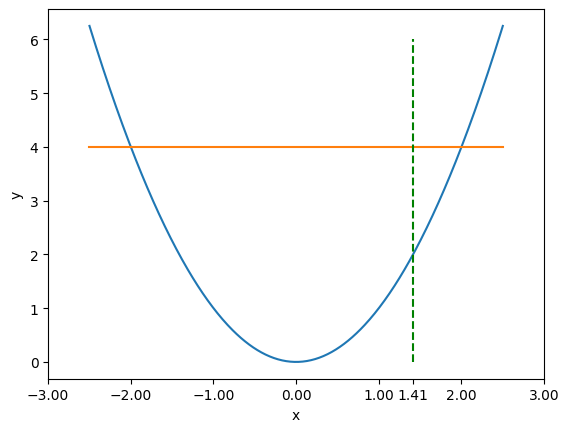

In [283]:
import matplotlib.pyplot as plt
import numpy as np

# Create domain
step = 0.01
X = np.arange(-2.5, 2.5+step, step)
plt.xlabel('x')
plt.ylabel('y')
# Plot y=x^2
plt.plot(X, X**2)
# Plot y=4
plt.plot([-2.5, 2.5], [4, 4])
# Plot x=1.41≈sqrt(2)
plt.plot([1.41, 1.41], [0, 6], "g--")
# Add a marker for 1.41
plt.xticks(list(plt.xticks()[0]) + [1.41])
plt.show()

This idea can be extended to 3 dimensions, where it is called the **volume integral**. It follows the same conceptual idea as the surface integral and takes the form $\iiint_V f(x,y,z) \, \mathrm{d}V$. For volume integrals, it is always the case that $\mathrm{d}V = \mathrm{d}x\mathrm{d}y\mathrm{d}z$.

Moving back to surfaces, we should point out that a surface may not always lie in the $xy$-plane, and for most real world applications, it won't. This is where the more powerful equation for a surface integral comes in to play.

$$ \iint _{S} f \,\mathrm{d}S = \iint _{T} f (\boldsymbol{\underline{r}}(s,t)) \left\lVert \frac{\partial \boldsymbol{\underline{r}}}{\partial s}\times \frac{\partial \boldsymbol{\underline{r}}}{\partial t}\right\rVert\mathrm {d} s\,\mathrm {d} t
$$

We have used a bit of shorthand here. $\boldsymbol{\underline{r}}$ is just shorthand for a generic point on our surface. It is now a function of $s$ and $t$ because we have **parameterised** it with a new coordinate system. Let's consider an example. We can integrate $1$ over the surface of a sphere of radius $R$. Doing this should give us the surface area $4 \pi R^2$. Firstly, we need to parameterise. We have a very useful transformation from cartesian coordinates, that is perfectly suited to the equation of a sphere. These are called **spherical coordinates**. Recall that spherical coordinates are defined by $x=R\sin\theta\cos\phi$, $y=R\sin\theta\sin\phi$ and $z=R\cos\theta$. Therefore, the equation of our surface is $\boldsymbol{\underline{r}}(\theta,\phi) = (R\sin\theta\cos\phi, R\sin\theta\sin\phi, R\cos\theta)$. 

Next we calculate the partial derivates we need, which are $\frac{\partial r}{\partial \theta} = (R\cos\theta\cos\phi, R\cos\theta\sin\phi, -R\sin\theta), \frac{\partial r}{\partial \phi} = (-R\sin\theta\sin\phi, R\sin\theta\cos\phi, 0)$.

Then the magnitude of the cross product of these two is 

$$\left\lVert \frac{\partial \boldsymbol{\underline{r}}}{\partial s}\times \frac{\partial \boldsymbol{\underline{r}}}{\partial t} \right\rVert = \left\lVert (R^2\sin^2\theta\cos\phi, R^2\sin^2\theta\sin\phi, R^2\cos\theta\sin\theta) \right\rVert = R^2\sin\theta\sqrt{\sin^2\theta\cos^2\phi + \sin^2\theta\sin^2\phi + \cos^2\phi} \\ = R^2\sin\theta\sqrt{\sin^2\theta(\cos^2\phi + \sin^2\phi) + \cos^2\phi} \\ = R^2\sin\theta$$

Hence, $\mathrm{d}S = R^2\sin\theta \, \mathrm{d}\theta \, \mathrm{d}\phi$. This result can always be used for spherical coordinates. 

Finally, we can perform the integration. Recall that in spherical coordinates, $\theta$ represents the polar angle (vertical), and varies between $0$ and $\pi$, and $\phi$ represents the azimuthal angle (horizontal) and varies between $0$ and $2\pi$. These will be our limits of integration since we want to integrate over the entire sphere.

$$ \begin{align*} \mathrm{SA} &= \iint_S \, \mathrm{d}S \\
&= \int_0^{2\pi} \int_0^\pi R^2\sin\theta \, \mathrm{d}\theta \, \mathrm{d}\phi \\ 
&= \int_0^{2\pi} \left[ -R^2\cos\theta \right]_0^\pi  \, \mathrm{d}\phi \\
&= \int_0^{2\pi} 2R^2  \, \mathrm{d}\phi \\
&= \left[ 2R^2\phi \right]_0^{2\pi} \\
&= 4 \pi R^2 \end{align*}
$$

Which yields the result we were looking for!

So we have covered multiple dimensional integration, but the concept can be further extended. Instead of just calculating surface integrals of scalar functions, we can define something called **flux**, which is a way of calculating the integral of a vector field over some surface.
Informally, flux is the amount of a vector field that passes through a given surface. The more perpendicular the vector field is to the surface, the greater the flux. Consider again our surface $S$, but now define a vector field $F$ over the same domain. If we want to know how much of the field is passing through the surface, we take the can consider a single surface element $\mathrm{dS}$, as seen below.

| ![Vector field through surface](Vector_field_through_surface.png)| ![Flux surface element](Flux_surface_element.png) |
|:---:|:---:|
|Fig 3: $\underline{F}$ passing through $S$|Fig 4: A single surface element $\mathrm{dS}$|

In Fig 4, $\boldsymbol{\underline{\hat{n}}}$ is the surface normal vector to $\mathrm{d}S$. Then to calculate 'how perpendicular' $\boldsymbol{\underline{F}}$ is to $\boldsymbol{\underline{\hat{n}}}$, you only need to calculate the dot product between them. Then to recombine we just take the double integral with respect to $\mathrm{d}S$, giving the final formula for flux. We have also used the common shorthand $\boldsymbol{\underline{\hat{n}}} \, \mathrm{d}S = \boldsymbol{\underline{\mathrm{d}S}}$ which is called the **vector surface element**.

$$ \iint \underline{F} \cdot \boldsymbol{\underline{\hat{n}}} \, \mathrm{d}S = \iint \underline{F} \cdot \boldsymbol{\underline{\mathrm{d}S}}$$

We won't be looking at an example here, there won't be any need for us to calculate flux integrals in the finite element method, but it is necessary to know what they are in order to understand the Divergence theorem.

##### Check Exercises 5

- Find the integral of $f(x,y) = x^2 + y$ over a unit square in the $xy$-plane.
- Find the surface area of the surface given by $z = x+y$ on the interval $0 \leq x \leq 1$ and $0 \leq y \leq 1$.
- Derive the surface area of a cylinder with radius $R$ and height $h$ in the same way as we derived the surface area of a sphere. You can use **cylindrical coordinates**, the transformation is given by $$x=R\cos\phi,\quad y=R\sin\phi,\quad z=z\quad\mbox{ with }\quad 0\leq\phi\leq 2\pi.$$

### 2.4 Vector Calculus Theorems

The **Divergence Theorem** is a central result in vector calculus. It brings together the ideas of divergence and flux in a single equation. The formal definition of the Divergence Theorem is,

$\newcommand{\oiint}{{\subset\!\supset} \llap{\iint}}$
$$\oiint_S \, \,\boldsymbol{\underline{F}}\cdot\boldsymbol{\underline{\mathrm{d}S}}=\iiint_{V}(\boldsymbol{\underline{\nabla}}\,\cdot\boldsymbol{\underline{F}}) \,\mathrm{d}V$$

The small circle in the $\unicode{x222F}$ symbol represents that the surface we are integrating over is closed. What is being said here, is that the flux going through a closed surface is equal to the total divergence inside that surface. This is essentially a mathematical statement of an intuitive fact, that the amount of a field going through the surface of a region (*flux*) must equal the amount of a field coming out individual points inside the region (*divergence*). It should be noted that this theorem also holds for other dimensions, e.g. the two dimensional version looks like this.

$$\oint_S\boldsymbol{\underline{F}}\cdot\boldsymbol{\underline{\mathrm{d}S}}=\iint_{V}(\boldsymbol{\underline{\nabla}}\,\cdot\boldsymbol{\underline{F}}) \,\mathrm{d}V$$

The Divergence theorem is an incredibly useful one and can be used to simplify tricky surface integrals, as well as being a starting point for deriving many other important corollarys. For example, we have **Green's Identites**, which will prove massively useful in rewriting certain PDEs. We will derive the first of these now.

We start with the divergence theorem, but we take the special case where $\boldsymbol{\underline{F}} = g\nabla f$ for some scalar fields $f$ and $g$. Substituting into the formula for divergence yields,

$$
\nabla \cdot \boldsymbol{\underline{F}} = \nabla \cdot \big( f \, \nabla g \big)
$$

We can then break up the dels into their constituent partial derivatives. Note here, instead of using the usual $x,y,z$ we are using $x_0, x_1, x_2$. They are equivalent, this is just for the ease of using summation notation.

$$\begin{align*}
&= \sum_{i=0}^2 \frac{\partial}{\partial x_i} \Big[ f \, \nabla g \Big]_i \\
&= \sum_{i=0}^2 \frac{\partial}{\partial x_i} \Big[ f \, \frac{\partial g}{\partial x_i} \Big]
\end{align*}$$

The small $i$ indicates we are talking about the $i$-th component of $\nabla g$. Then we can use the product rule to expand. It works exactly the same as it does for regular derivatives.

$$\begin{align*}
&= \sum_{i=0}^2 \Bigg( \Big(\frac{\partial f}{\partial x_{i}}\Big) \Big(\frac{
\partial g}{\partial x_{i}}\Big) + f\frac{\partial^2 g}{\partial x_i^2} \Bigg) \\
&= (\nabla f) \cdot (\nabla g) + f\nabla^2g
\end{align*}$$

We have introduced one of the other differential operators that was mentioned earlier, the **Laplacian**! Defined on scalar fields, it is written $\nabla^2 = \nabla \cdot \nabla = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2}$. Essentially it is the sum of all non-mixed second partial derivatives. But this is precisely Green's first identity, in full it states

$$
\iiint_{V} \bigg( (\nabla f) \cdot (\nabla g) + f\nabla^{2} g \bigg) \, \mathrm{d}V = \oiint_{S} \, \, \,f \, \nabla\,g\cdot \boldsymbol{\underline{\mathrm{d}S}}
$$

##### Check Exercises 6

- Green's second identity is written $$ \iiint_V \left(f \, \nabla^2 g - g \nabla^2 f \right) \mathrm{d}V = \oiint_S \, \left( f \nabla g - g\nabla f \right) \cdot \, \boldsymbol{\underline{\mathrm{d}S}}$$ derive it by substituting $\boldsymbol{\underline{F}} = f \nabla g - g\nabla f$ into the Divergence Theorem.